# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to deomstrat functionality rather than be a tutorial.

In [1]:
%matplotlib inline
import datacube

If you have set up your config correctly, or are using the module on NCI, you should be able to make `Datacube` object that can connects to the configured datacube system.

In [2]:
dc = datacube.Datacube(app='dc-example')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://adh547@130.56.244.227:5432/unification)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [3]:
dc.list_products()

name  \
id                                 
1                       dsm1sv10   
2   ls5_satellite_telemetry_data   
3               ls5_level1_scene   
4                 ls5_nbar_scene   
5                ls5_nbart_scene   
7   ls7_satellite_telemetry_data   
8               ls7_level1_scene   
9                 ls7_nbar_scene   
10               ls7_nbart_scene   
12  ls8_satellite_telemetry_data   
13              ls8_level1_scene   
6                   ls5_pq_scene   
14                ls8_nbar_scene   
15               ls8_nbart_scene   
17               ls5_nbar_albers   
19            modis_mcd43a1_tile   
20            modis_mcd43a2_tile   
21            modis_mcd43a3_tile   
22            modis_mcd43a4_tile   
23            h8_ahi_brf_granule   
24            h8_ahi_obs_granule   
25          h8_ahi_solar_granule   
26           s2a_level1c_granule   
29               ls5_ndvi_albers   
18                 ls5_pq_albers   

                                          description     platform  \
id                                                                   
1                                DSM 1sec Version 1.0         SRTM   
2                  Landsat 5 Satellite Telemetry Data    LANDSAT_5   
3                 Landsat 5 Level 1 - Ortho Rectified    LANDSAT_5   
4                             Landsat 5 NBAR 25 metre    LANDSAT_5   
5                            Landsat 5 NBART 25 metre    LANDSAT_5   
7                  Landsat 7 Satellite Telemetry Data    LANDSAT_7   
8                 Landsat 7 Level 1 - Ortho Rectified    LANDSAT_7   
9                             Landsat 7 NBAR 25 metre    LANDSAT_7   
10                           Landsat 7 NBART 25 metre    LANDSAT_7   
12                 Landsat 8 Satellite Telemetry Data    LANDSAT_8   
13                Landsat 8 Level 1 - Ortho Rectified    LANDSAT_8   
6                               Landsat 5 PQ 25 metre    LANDSAT_5   
14                            Landsat 8 NBAR 25 metre    LANDSAT_8   
15                           Landsat 8 NBART 25 metre    LANDSAT_8   
17  Landsat 5 NBAR 25 metre, 100km tile, Australia...    LANDSAT_5   
19                            MODIS 500 metre MCD43A1   AQUA_TERRA   
20                            MODIS 500 metre MCD43A2   AQUA_TERRA   
21                            MODIS 500 metre MCD43A3   AQUA_TERRA   
22                            MODIS 500 metre MCD43A4   AQUA_TERRA   
23                 H8 BRF, 2km, 1km and 500m granules   HIMAWARI_8   
24                               H8 OBS, 2km granules   HIMAWARI_8   
25      H8 SOLAR GEOMETRY, 2km, 1km and 500m granules   HIMAWARI_8   
26               Sentinel-2 Level 1 - Ortho Rectified  SENTINEL_2A   
29                                     Landsat 5 NDVI    LANDSAT_5   
18  Landsat 5 PQ 25 metre, 100km tile, Australian ...    LANDSAT_5   

                product_type instrument             format        crs  \
id                                                                      
1                        DEM        SIR               ENVI  EPSG:4326   
2   satellite_telemetry_data         TM                NaN        NaN   
3                     level1         TM            GeoTiff        NaN   
4                       nbar         TM            GeoTiff        NaN   
5                      nbart         TM            GeoTiff        NaN   
7   satellite_telemetry_data        ETM                NaN        NaN   
8                     level1        ETM            GeoTiff        NaN   
9                       nbar        ETM            GeoTiff        NaN   
10                     nbart        ETM            GeoTiff        NaN   
12  satellite_telemetry_data        OLI                NaN        NaN   
13                    level1        OLI            GeoTiff        NaN   
6                        pqa         TM            GeoTiff        NaN   
14                      nbar        OLI            GeoTiff        NaN   
15                     nbart        OLI            GeoTiff        NaN

## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [4]:
dc.list_measurements()

aliases    dtype  \
product              measurement                                        
dsm1sv10             elevation                           NaN  float32   
ls5_nbar_scene       1                        [band_1, blue]    int16   
                     2                       [band_2, green]    int16   
                     3                         [band_3, red]    int16   
                     4                         [band_4, nir]    int16   
                     5                       [band_5, swir1]    int16   
                     7                       [band_7, swir2]    int16   
ls5_nbart_scene      1                        [band_1, blue]    int16   
                     2                       [band_2, green]    int16   
                     3                         [band_3, red]    int16   
                     4                         [band_4, nir]    int16   
                     5                       [band_5, swir1]    int16   
                     7                       [band_7, swir2]    int16   
ls7_nbar_scene       1                        [band_1, blue]    int16   
                     2                       [band_2, green]    int16   
                     3                         [band_3, red]    int16   
                     4                         [band_4, nir]    int16   
                     5                       [band_5, swir1]    int16   
                     7                       [band_7, swir2]    int16   
ls7_nbart_scene      1                        [band_1, blue]    int16   
                     2                       [band_2, green]    int16   
                     3                         [band_3, red]    int16   
                     4                         [band_4, nir]    int16   
                     5                       [band_5, swir1]    int16   
                     7                       [band_7, swir2]    int16   
ls5_pq_scene         pqa                 [qa_flags, quality]    int16   
ls8_nbar_scene       1             [band_1, coastal_aerosol]    int16   
                     2                        [band_2, blue]    int16   
                     3                       [band_3, green]    int16   
                     4                         [band_4, red]    int16   
...                                                      ...      ...   
h8_ahi_obs_granule   05_2000                        [band_5]  float32   
                     06_2000                        [band_6]  float32   
                     07_2000                        [band_7]  float32   
                     08_2000                        [band_8]  float32   
                     09_2000                        [band_9]  float32   
                     10_2000                       [band_10]  float32   
                     11_2000                       [band_11]  float32   
                     12_2000                       [band_12]  float32   
                     13_2000                       [band_13]  float32   
                     14_2000                       [band_14]  float32   
                     15_2000                       [band_15]  float32   
                     16_2000                       [band_16]  float32   
h8_ahi_solar_granule SOLAR_1000                          NaN  float32   
                     SOLAR_2000                          NaN  float32   
                     SOLAR_500                           NaN  float32   
s2a_level1c_granule  01                [band_01, B01, Band1]    int16   
                     02                [band_02, B02, Band2]    int16   
                     03                [band_03, B03, Band3]    int16   
                     04                [band_04, B04, Band4]    int16   
                     05                [band_05, B05, Band5]    int16   
                     06                [band_06, B06, Band6]    int16   
                     07                [band_07, B07, Band7]    int16   
                     08               

## Retrieving data


In [5]:
nbar = dc.load(product='ls5_nbar_albers', x=(149.25, 149.35), y=(-35.25, -35.35))

The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [6]:
nbar

<xarray.Dataset>
Dimensions:  (time: 179, x: 421, y: 490)
Coordinates:
  * time     (time) datetime64[ns] 1990-03-02T23:11:16 1990-03-02T23:11:39 ...
  * y        (y) float64 -3.956e+06 -3.956e+06 -3.956e+06 -3.956e+06 ...
  * x        (x) float64 1.56e+06 1.56e+06 1.56e+06 1.56e+06 1.56e+06 ...
Data variables:
    blue     (time, y, x) int16 3457 3247 3247 3438 3552 3324 2881 2997 2551 ...
    green    (time, y, x) int16 3924 3595 3554 3678 3842 3637 3223 3348 2891 ...
    red      (time, y, x) int16 4140 3766 3804 3954 4103 3916 3429 3504 3089 ...
    nir      (time, y, x) int16 5665 5331 5283 5426 5617 5427 4949 5140 4710 ...
    swir1    (time, y, x) int16 6626 6045 5840 5943 6080 6011 5704 5875 5362 ...
    swir2    (time, y, x) int16 5782 5286 5138 5187 5435 5386 4940 5088 4791 ...
Attributes:
    crs: EPSG:3577

We can look at the data by name directly, or through the `data_vars` dictionary:

In [7]:
nbar.data_vars

Data variables:
    blue     (time, y, x) int16 3457 3247 3247 3438 3552 3324 2881 2997 2551 ...
    green    (time, y, x) int16 3924 3595 3554 3678 3842 3637 3223 3348 2891 ...
    red      (time, y, x) int16 4140 3766 3804 3954 4103 3916 3429 3504 3089 ...
    nir      (time, y, x) int16 5665 5331 5283 5426 5617 5427 4949 5140 4710 ...
    swir1    (time, y, x) int16 6626 6045 5840 5943 6080 6011 5704 5875 5362 ...
    swir2    (time, y, x) int16 5782 5286 5138 5187 5435 5386 4940 5088 4791 ...

In [8]:
nbar.green

<xarray.DataArray 'green' (time: 179, y: 490, x: 421)>
array([[[3924, 3595, 3554, ...,  466,  509,  553],
        [4047, 3801, 3595, ...,  466,  509,  509],
        [4210, 4047, 4006, ...,  466,  466,  509],
        ..., 
        [-999, -999, -999, ...,  904,  991,  817],
        [-999, -999, -999, ...,  948, 1034,  991],
        [-999, -999, -999, ...,  861,  991, 1034]],

       [[3856, 3610, 3569, ...,  490,  534,  577],
        [4061, 3816, 3610, ...,  490,  534,  534],
        [4183, 4061, 4061, ...,  490,  490,  534],
        ..., 
        [ 663,  576,  533, ...,  971, 1014,  841],
        [ 619,  619,  489, ...,  971, 1057, 1057],
        [ 706,  706,  576, ...,  884, 1014, 1057]],

       [[3117, 3117, 3225, ..., 2522, 2248, 2082],
        [3171, 3171, 3117, ..., 2631, 2412, 2138],
        [3063, 3063, 3008, ..., 2467, 2522, 2193],
        ..., 
        [2857, 2966, 3129, ..., 1256, 1200, 1200],
        [2857, 3075, 3346, ..., 1368, 1312, 1480],
        [2911, 3129, 3292, ..., 

## Plotting data
We can select the data at a particular time and see what is there. We can use pandas-style labels to select a time period, inclusive of the end label:

In [9]:
autumn = nbar.green.loc['1991-3':'1991-5']
autumn.shape

(9, 490, 421)

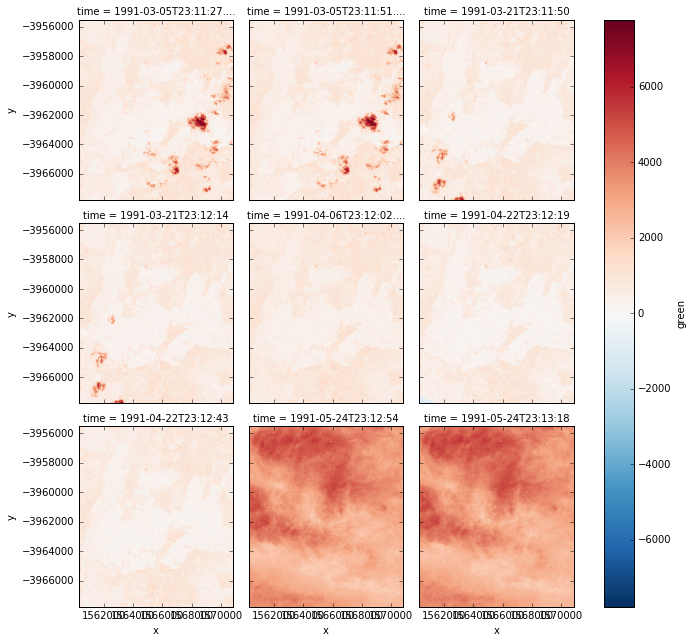

In [10]:
autumn.plot(col='time', col_wrap=3)

## Masking out NO_DATA values
When there is no data availaible, such as on the boundaries of a scene, it is filled in with a special value.
We can use filter it out, although xarray will convert the data from `int` to `float` so that it can use `NaN` to indicate no data.

Now that bad values are no longer represented as `-9999`, the data fits on a much better colour ramp:

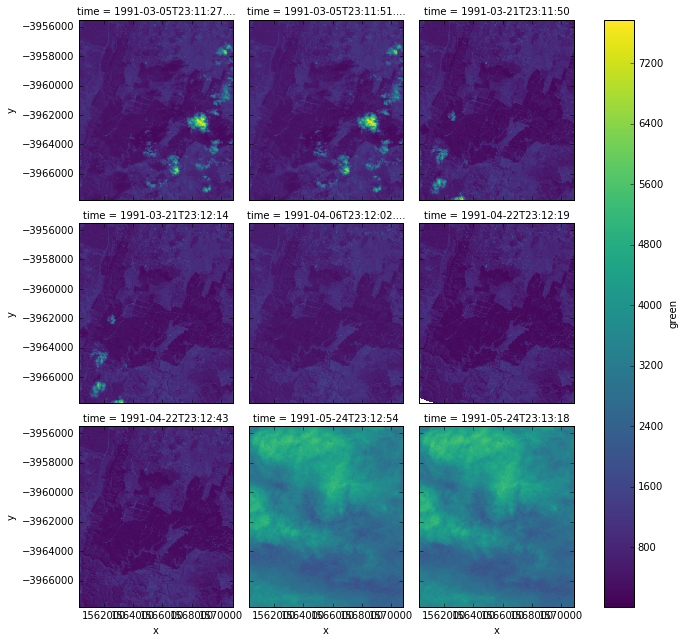

In [11]:
autumn_valid = autumn.where(autumn != autumn.attrs['nodata'])
autumn_valid.plot(col='time', col_wrap=3)

## Masking out cloud
Some of the images are clearly clouds, we should remove them.  There is a product with detected clouds called **PQ** (for Pixel Quality) we can use to mask out the clouds.

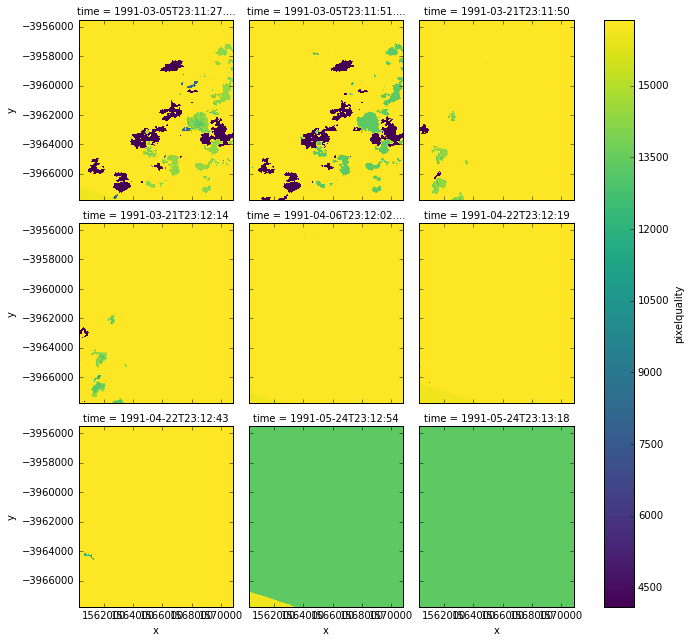

In [12]:
pq = dc.load(product='ls5_pq_albers', x=(149.25, 149.35), y=(-35.25, -35.35))
pq_autumn = pq.pixelquality.loc['1991-3':'1991-5']
pq_autumn.plot(col='time', col_wrap=3)

The PQ layer stores a bitmask of several values. We can list the information available:

In [13]:
from datacube.storage import masking
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')

values  \
blue_saturated                              {u'1': False, u'0': True}   
cloud_acca                        {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_fmask                       {u'1': u'no_cloud', u'0': u'cloud'}   
cloud_shadow_acca   {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
cloud_shadow_fmask  {u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}   
contiguous                                  {u'1': True, u'0': False}   
ga_good_pixel                                        {u'16383': True}   
green_saturated                             {u'1': False, u'0': True}   
land_sea                                {u'1': u'land', u'0': u'sea'}   
nir_saturated                               {u'1': False, u'0': True}   
red_saturated                               {u'1': False, u'0': True}   
swir1_saturated                             {u'1': False, u'0': True}   
swir2_saturated                             {u'1': False, u'0': True}   
tir_saturated                               {u'1': False, u'0': True}   

                                                              bits  \
blue_saturated                                                   0   
cloud_acca                                                      10   
cloud_fmask                                                     11   
cloud_shadow_acca                                               12   
cloud_shadow_fmask                                              13   
contiguous                                                       8   
ga_good_pixel       [13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]   
green_saturated                                                  1   
land_sea                                                         9   
nir_saturated                                                    3   
red_saturated                                                    2   
swir1_saturated                                                  4   
swir2_saturated                                                  7   
tir_saturated                                                    5   

                                                         description  
blue_saturated                                Blue band is saturated  
cloud_acca                                       Cloud Shadow (ACCA)  
cloud_fmask                                            Cloud (Fmask)  
cloud_shadow_acca                                Cloud Shadow (ACCA)  
cloud_shadow_fmask                              Cloud Shadow (Fmask)  
contiguous          All bands for this pixel contain non-null values  
ga_good_pixel                                     Best Quality Pixel  
green_saturated                              Green band is saturated  
land_sea                                                 Land or Sea  
nir_saturated                                  NIR band is saturated  
red_saturated                                  Red band is saturated  
swir1_saturated                              SWIR1 band is saturated  
swir2_saturated                              SWIR2 band is saturated  
tir_saturated                     Thermal Infrared band is saturated

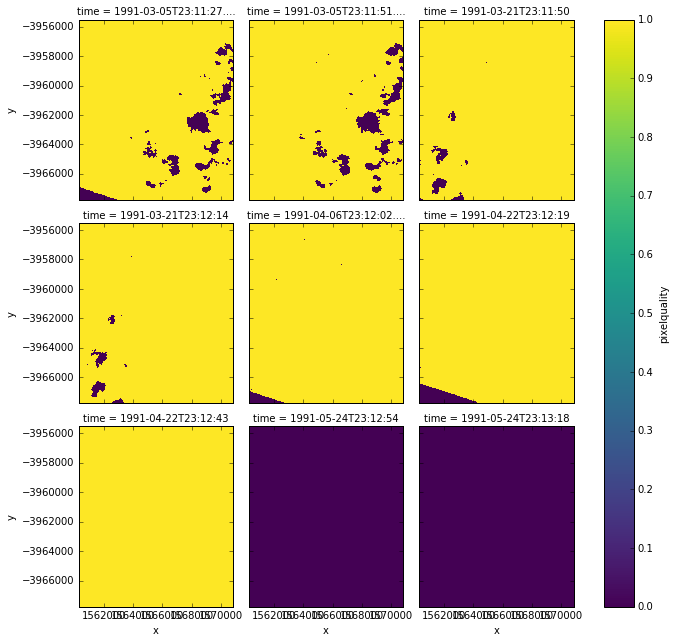

In [14]:
good_data = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True)
autumn_good_data = good_data.pixelquality.loc['1991-3':'1991-5']
autumn_good_data.plot(col='time', col_wrap=3)

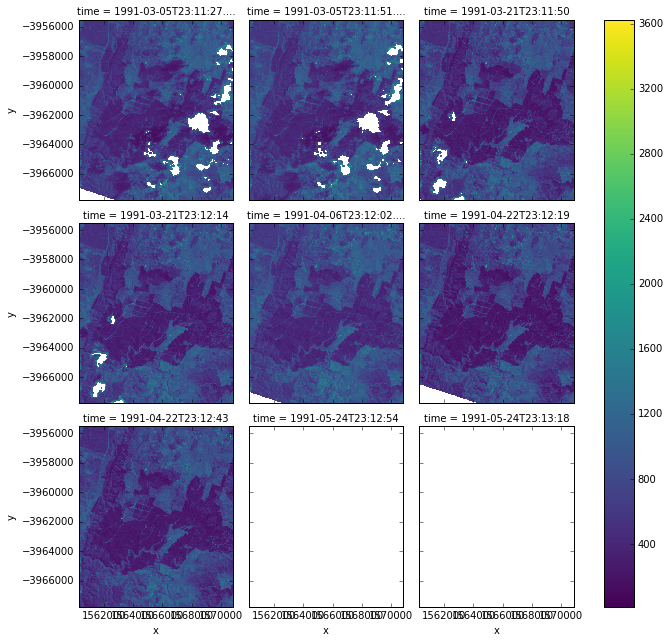

In [15]:
autumn_cloud_free = autumn_valid.where(autumn_good_data)
autumn_cloud_free.plot(col='time', col_wrap=3)

## Group by time
You may have noticed that some of the days above are repeated, with times less than a minute apart.  this is because of the overlap in LANDSAT scenes.  If we group by solar day (a rough local time based on longitude), we can combine these slices:

In [16]:
nbar_by_solar_day = dc.load(product='ls5_nbar_albers', x=(149.25, 149.35), y=(-35.25, -35.35), group_by='solar_day')
len(nbar_by_solar_day.time)

99

We have fewer times than we did previously.

In [17]:
autumn2 = nbar_by_solar_day.green.loc['1991-3':'1991-5']
autumn2.shape

(5, 490, 421)

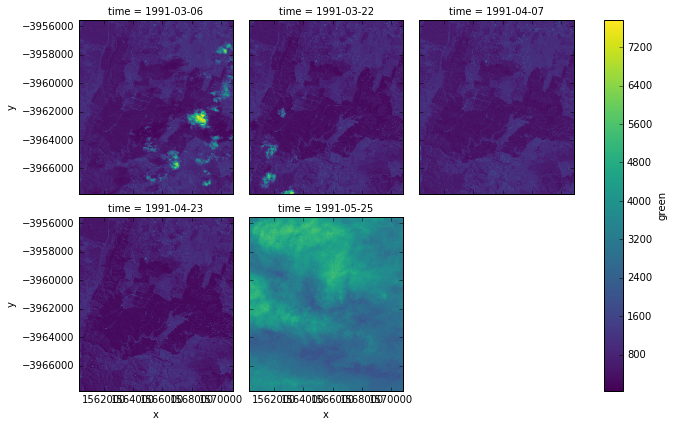

In [18]:
autumn2.plot(col='time', col_wrap=3)

## Some basic band maths
We can combine the `red` and `nir` (_near-infrared_) bands to calculate NDVI (_normalised difference vegetation index_).

In [19]:
two_bands = dc.load(product='ls5_nbar_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
                    time=('1991', '1992'), measurements=['red', 'nir'], group_by='solar_day')
red = two_bands.red.where(two_bands.red != two_bands.red.attrs['nodata'])
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
pq = dc.load(product='ls5_pq_albers', x=(149.07, 149.17), y=(-35.25, -35.35), 
             time=('1991', '1992'), group_by='solar_day')
cloud_free = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True).pixelquality

ndvi = ((nir - red) / (nir + red)).where(cloud_free)

In [20]:
ndvi.shape

(18, 490, 420)

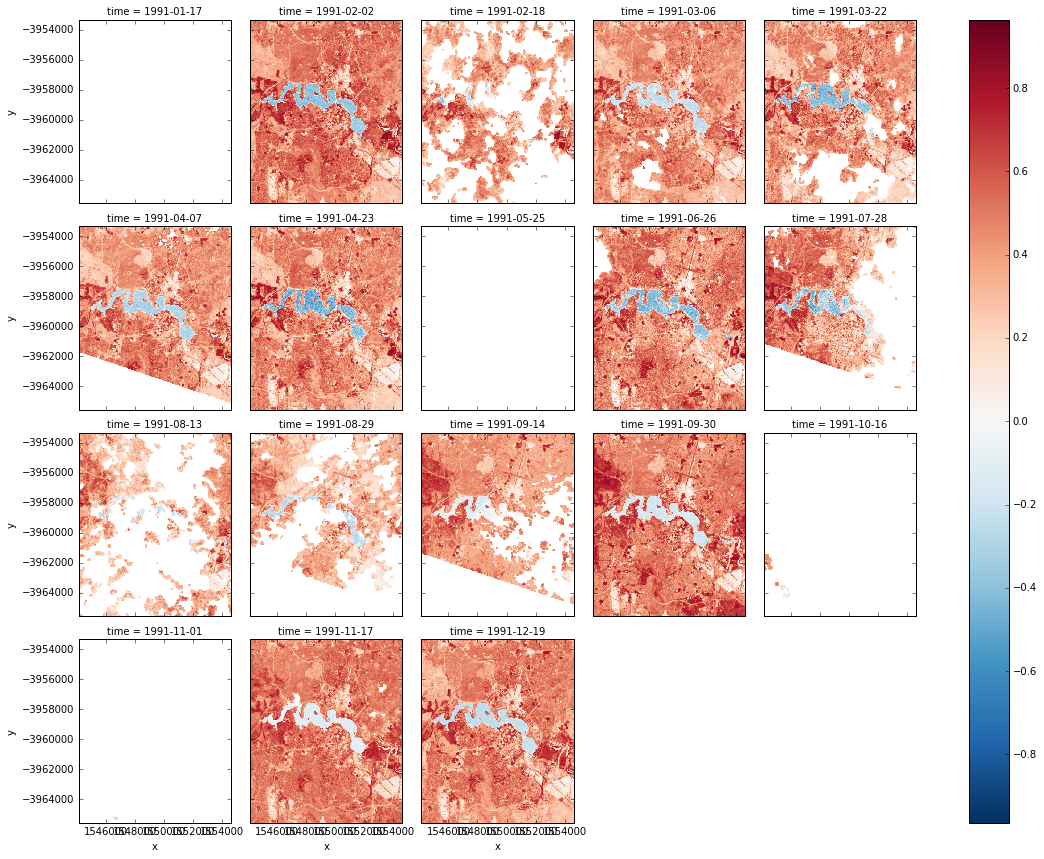

In [21]:
ndvi.plot(col='time', col_wrap=5)

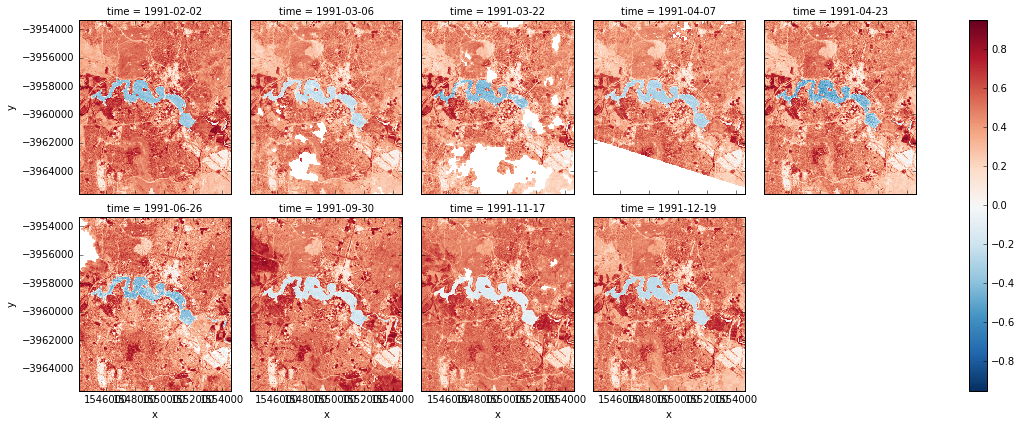

In [22]:
mostly_cloud_free = cloud_free.sum(dim=('x','y')) > (0.75 * cloud_free.size / cloud_free.time.size)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
mostly_good_ndvi.plot(col='time', col_wrap=5)

## Some stats

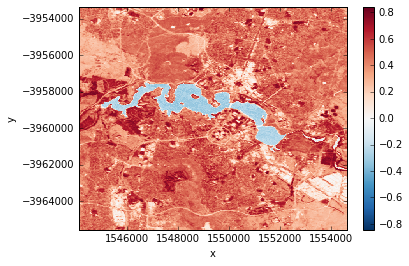

In [23]:
mostly_good_ndvi.median(dim='time').plot()

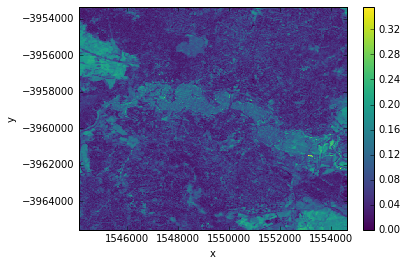

In [24]:
mostly_good_ndvi.std(dim='time').plot()

## Pixel drill

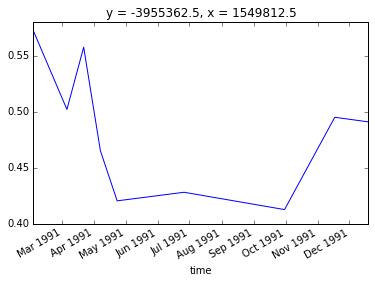

In [25]:
mostly_good_ndvi.sel(y=-3955361, x=1549813, method='nearest').plot()

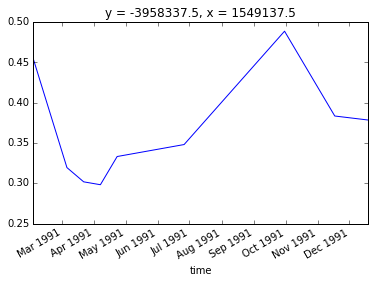

In [26]:
mostly_good_ndvi.isel(x=[200], y=[200]).plot()

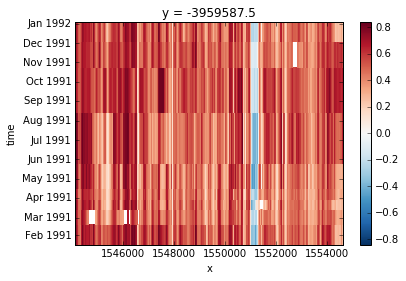

In [27]:
mostly_good_ndvi.isel(y=250).plot()

A line shapefile with pairs of coordinates (using `sel_points` instead of `isel_points`) would be able to be interpolated into something less blocky for the next plot.

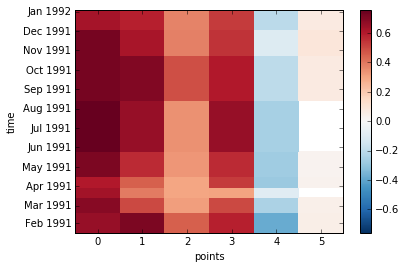

In [28]:
mostly_good_ndvi.isel_points(x=[0, 100, 200, 300, 300, 400], 
                             y=[200, 200, 200, 250, 300, 400]).plot(x='points', y='time')

## Plotting a multi-band image

In [29]:
rgb = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('1991-3-1', '1991-6-30'), 
              measurements=['red', 'green', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')
zip(rgb.dims, rgb.shape)

[('time', 6), ('y', 490), ('x', 420), ('color', 3)]

In [30]:
fake_saturation = 3000
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

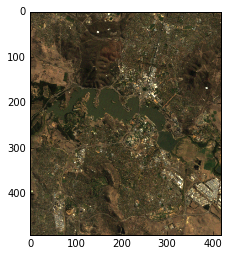

In [31]:
from matplotlib import pyplot as plt
plt.imshow(scaled.isel(time=3))

## Elevation

In [32]:
grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35))
grid.elevation.shape

(1, 361, 361)

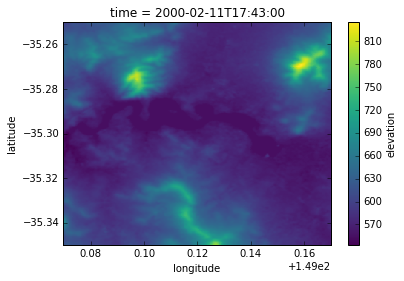

In [33]:
grid.elevation[0].plot()

## Reprojection

In [34]:
albers_grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35), 
                      output_crs='EPSG:3577', resolution=(-25,25))
albers_grid.elevation.shape

(1, 490, 420)

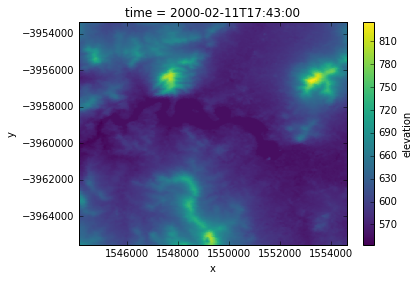

In [35]:
albers_grid.elevation[0].plot()